# Random Forest

###### Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


Data Description :

Undergrad : person is under graduated or not;
Marital.Status : marital status of a person;
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government ;
Work Experience : Work experience of an individual person;
Urban : Whether that person belongs to urban area or not;


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1) (2).csv


In [ ]:
fc=pd.read_csv("Fraud_check (1).csv")

In [ ]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fc.shape

(600, 6)

In [ ]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fc.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

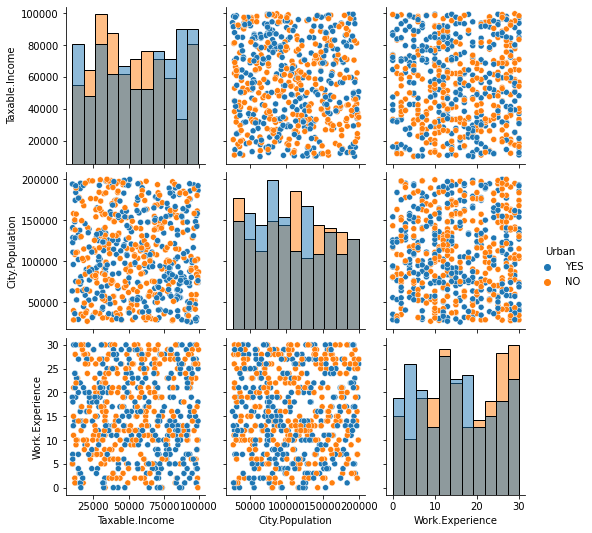

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=fc, hue="Urban", diag_kind="hist")
plt.show()

In [ ]:
fc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
#Categorical variables
category= [var for var in fc.columns if fc[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(category)))
print('The categorical variables are as follows :\n\n', category)

There are 3 categorical variables

The categorical variables are as follows :

 ['Undergrad', 'Marital.Status', 'Urban']


In [ ]:
#Numerical variables
numerical = [var for var in fc.columns if fc[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 3 numerical variables

The numerical variables are : ['Taxable.Income', 'City.Population', 'Work.Experience']


In [ ]:
# cardinality check
for var in category:   
    print(var, 'has ', len(fc[var].unique()), ' labels')

Undergrad has  2  labels
Marital.Status has  3  labels
Urban has  2  labels


In [ ]:
fc[fc.duplicated()].shape

(0, 6)

In [ ]:
fc["Taxable.Income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [ ]:
fc['Taxable.Income'] = pd.cut(fc['Taxable.Income'], bins=[0,30000,99620], labels=['risky', 'good'])

In [ ]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [ ]:
fc = fc.rename(columns={'Taxable.Income': 'Taxinc',
                        'Marital.Status': 'marital',
                         'City.Population': 'population',
                         'Work.Experience' :'Experience'})

In [ ]:
fc['Taxinc']=fc['Taxinc'].map({'risky':0,'good':1})

In [ ]:
fc.head()

,Undergrad,marital,Taxinc,population,Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [ ]:
label_encoder = preprocessing.LabelEncoder()

fc['Urban']= label_encoder.fit_transform(fc['Urban'])
fc['Undergrad']= label_encoder.fit_transform(fc['Undergrad'])
fc['marital']= label_encoder.fit_transform(fc['marital'])
fc['Taxinc']=label_encoder.fit_transform(fc['Taxinc'])

In [ ]:
fc.head()

,Undergrad,marital,Taxinc,population,Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(fc)
df_norm.tail(10)

,Undergrad,marital,Taxinc,population,Experience,Urban
590,0.0,0.5,1.0,0.341473,0.466667,1.0
591,1.0,1.0,0.0,0.615406,0.600000,1.0
592,1.0,1.0,1.0,0.283703,0.533333,0.0
593,0.0,0.0,1.0,0.610256,0.333333,1.0
594,0.0,0.5,1.0,0.412341,0.300000,1.0
595,1.0,0.0,1.0,0.078811,0.233333,1.0
596,1.0,0.0,1.0,0.170058,0.066667,1.0
597,0.0,0.0,1.0,0.737240,0.000000,1.0
598,1.0,0.5,1.0,0.886810,0.566667,0.0
599,0.0,0.0,1.0,0.760683,0.533333,0.0


In [ ]:
x=fc.iloc[:,:-1]
y=fc['Taxinc']

In [ ]:
x

,Undergrad,marital,Taxinc,population,Experience
0,0,2,1,50047,10
1,1,0,1,134075,18
2,0,1,1,160205,30
3,1,2,1,193264,15
4,0,1,1,27533,28
...,...,...,...,...,...
595,1,0,1,39492,7
596,1,0,1,55369,2
597,0,0,1,154058,0
598,1,1,1,180083,17


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxinc, Length: 600, dtype: int64

In [ ]:
df_norm.Taxinc.value_counts()

1.0    476
0.0    124
Name: Taxinc, dtype: int64

In [ ]:
colnames = list(fc.columns)
colnames

['Undergrad', 'marital', 'Taxinc', 'population', 'Experience', 'Urban']

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

### Building Random forest  Classifier model


In [ ]:
model01 = RandomForestClassifier(n_estimators=100, max_depth=10)
model01.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(model01, x, y, cv=kfold)

In [ ]:
print(results.mean())

1.0


In [ ]:
#Predicting on test data
preds01 = model01.predict(x_test) # predicting on test data set 
pd.Series(preds01).value_counts() # getting the count of each category 

1    143
0     37
dtype: int64

In [ ]:
preds01

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [ ]:
pd.crosstab(y_test,preds01) # getting the 2 way table to understand the correct and wrong predictions|

col_0,0,1
Taxinc,,
0,37,0
1,0,143


In [ ]:
# Accuracy 
np.mean(preds01==y_test)

1.0

### finding the best hyperparameter using grid searchCV

In [ ]:
# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [10, 20, 30]}

In [ ]:
# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

In [ ]:
# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [ ]:
# Get the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [ ]:
model_best = RandomForestClassifier(n_estimators=300, max_depth=10)
model_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300)

In [ ]:
#Predicting on test data
preds = model_best.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    143
0     37
dtype: int64

In [ ]:
preds

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions|

col_0,0,1
Taxinc,,
0,37,0
1,0,143


In [ ]:
print("the accuracy of the model =",accuracy_score(y_test,preds)*100)

the accuracy of the model = 100.0


    Random forest is the ensemble of the Decision trees and it is very useful in drawing the specific inferences form the data such as feature_importance and also to check the over fitting of the model
    
    here the model created is of accuracy 78.33% which is a good model
    also we can plot the individaul decision trees of the Random forest 

#### plotting of individual trees


In [ ]:
# Get the first decision tree in the random forest
# this may be used to plot any of the tree from the forest
tree = model_best.estimators_[0]

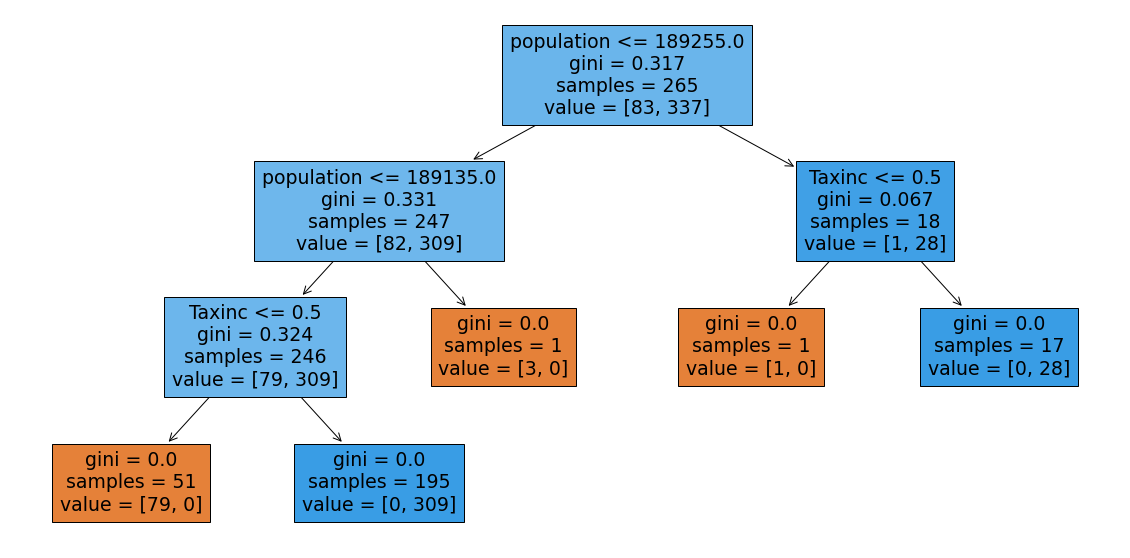

In [ ]:

# Plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=x.columns)
plt.show()